## WeatherPy

## Initialize

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

 # OpenWeatherMap API Key
api_key = api_keys.openweathermap_api_key

# Starting URL for Weather Map API Call
weather_base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

## Get weather for cities at random coordinates

In [3]:
# The provided starter picked 1500 coordinate points, not knowing how many unique cities would result.
# This is a fragile approach because in a different situation, 1500 coordinate points could yield fewer than 500 cities.
# Instead, this continues to pick points until getting 500 unique cities.
# Furthermore, not all cities yielded by citipy are found at api.openweathermap.org
# We want to get 500 unique cities that are found at api.openweathermap.org

n_cities = 500
cities = []
weather = []
# Identify nearest city for each lat, lng combination
while len(cities) < n_cities:
    lat = np.random.uniform(low=-90.000, high=90.000)
    lng = np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        # Now is the time to see if api.openweathermap.org recognizes this city 
        url = weather_base_url + "&q=" + city.city_name + ',' + city.country_code
        response = requests.get(url)
        if response.ok:
            cities.append(city)
            j = response.json()
            weather.append(j)
            # Include a print log of each city as it's being processed with the city number and city name.
            print(j['id'], j['name'], j['sys']['country'])

2159220 Mackay AU
1337619 Ugoofaaru MV
6185377 Yellowknife CA
3883457 Lebu CL
5354943 Half Moon Bay US
3863379 Mar del Plata AR
3404558 Cabedelo BR
1510377 Belyy Yar RU
6165406 Thompson CA
2088659 Panguna PG
3370903 Jamestown SH
469960 Vytegra RU
4031574 Provideniya RU
5224949 Smithfield US
3196864 Kutina HR
934322 Mahebourg MU
4030556 Rikitea PF
2075265 Busselton AU
2126710 Beringovskiy RU
3833367 Ushuaia AR
935215 Saint-Philippe RE
3662342 Sao Gabriel da Cachoeira BR
4720039 Port Arthur US
3621607 Santa Cruz CR
2022572 Khatanga RU
6320062 Vila Velha BR
3874787 Punta Arenas CL
2016307 Solnechnyy RU
1783621 Zunyi CN
1507390 Dikson RU
2120591 Tilichiki RU
3374083 Bathsheba BB
3369157 Cape Town ZA
2017155 Saskylakh RU
2179103 Whitianga NZ
1528998 Yumen CN
4252975 Barrow US
1015776 Bredasdorp ZA
2446796 Bilma NE
3070847 Merin CZ
3372472 Vila Franca do Campo PT
2110227 Butaritari KI
2152668 Portland AU
4013039 Concepcion del Oro MX
174448 Abu Kamal SY
501847 Rochegda RU
3427833 Tandil AR
2

939676 Willowmore ZA
2092164 Lorengau PG
1250161 Batticaloa LK
2654970 Brae GB
4021858 Guerrero Negro MX
73560 Lahij YE
3840300 Presidencia Roque Saenz Pena AR
3107677 Tortosa ES
2015217 Tokur RU
2259655 Impfondo CG
3868626 Valparaiso CL
916246 Kabompo ZM
231550 Kiboga UG
519062 Novoanninskiy RU
2128975 Nemuro JP
2051523 Bratsk RU
3947322 Arequipa PE
1729469 Baculin PH
2188371 Lincoln NZ
2630299 Hofn IS
3453478 Pitanga BR
1529376 Korla CN
3517251 Huatulco MX
2121385 Severo-Kurilsk RU
3388456 Sao Jose da Coroa Grande BR
1637001 Luwuk ID
3448455 Sao Miguel do Araguaia BR
2228373 Maroua CM
3587498 Acajutla SV
2070998 Geraldton AU
3491355 Black River JM
675418 Ivesti RO
3580279 Gouyave GD
5905393 Bonavista CA
5909514 Brooks CA
894701 Bulawayo ZW
1214724 Langsa ID
2065594 Mount Isa AU
489102 Staraya Poltavka RU
3924752 Senador Guiomard BR
5699404 Scottsbluff US
2219235 Awbari LY
6145890 Shelburne CA
6180550 Whitehorse CA
4154205 Edgewater US
1529484 Hami CN
3382160 Cayenne GF
6137411 Saint 

In [6]:
df = pd.DataFrame(weather)

In [7]:
df.head()

,base,clouds,cod,coord,dt,id,main,name,rain,sys,visibility,weather,wind
0,stations,{'all': 92},200,"{'lon': 149.2, 'lat': -21.15}",1529208000,2159220,"{'temp': 73.4, 'pressure': 1018, 'humidity': 3...",Mackay,NaN,"{'type': 1, 'id': 8172, 'message': 0.004, 'cou...",10000.0,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'speed': 11.41, 'deg': 170}"
1,stations,{'all': 48},200,"{'lon': 73, 'lat': 5.67}",1529211654,1337619,"{'temp': 82.3, 'pressure': 1025.88, 'humidity'...",Ugoofaaru,NaN,"{'message': 0.0034, 'country': 'MV', 'sunrise'...",NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 8.52, 'deg': 230.501}"
2,stations,{'all': 75},200,"{'lon': -114.38, 'lat': 62.45}",1529208000,6185377,"{'temp': 60.8, 'pressure': 1009, 'humidity': 5...",Yellowknife,NaN,"{'type': 1, 'id': 3558, 'message': 0.0042, 'co...",24140.0,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 13.87, 'deg': 160}"
3,stations,{'all': 76},200,"{'lon': -73.65, 'lat': -37.62}",1529211655,3883457,"{'temp': 52.69, 'pressure': 1032.68, 'humidity...",Lebu,{'3h': 0.115},"{'message': 0.0444, 'country': 'CL', 'sunrise'...",NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 5.39, 'deg': 135.501}"
4,stations,{'all': 90},200,"{'lon': -122.43, 'lat': 37.46}",1529210400,5354943,"{'temp': 57.6, 'pressure': 1009, 'humidity': 8...",Half Moon Bay,NaN,"{'type': 1, 'id': 392, 'message': 0.0049, 'cou...",9656.0,"[{'id': 721, 'main': 'Haze', 'description': 'h...","{'speed': 8.05, 'deg': 220}"


In [8]:
len(df)

500

In [9]:
df.to_csv('weather_data.csv')

## Temperature (F) vs. Latitude

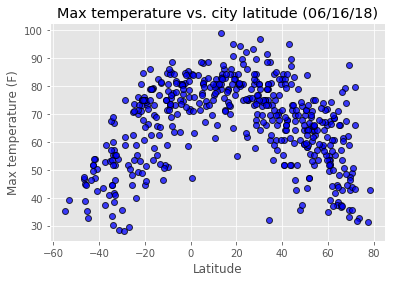

In [10]:
plt.style.use(['ggplot'])
lat = [x['lat'] for x in df['coord']]
temp_max = [x['temp_max'] for x in df['main']]
plt.scatter(lat, temp_max, c='b', alpha = 0.75, edgecolor = 'black', linewidths = 1)
plt.title ('Max temperature vs. city latitude (06/16/18)')
plt.xlabel ('Latitude')
plt.ylabel ('Max temperature (F)')
plt.savefig('max_temp_vs_lat.png', format='png')

## Humidity (%) vs. Lattitude

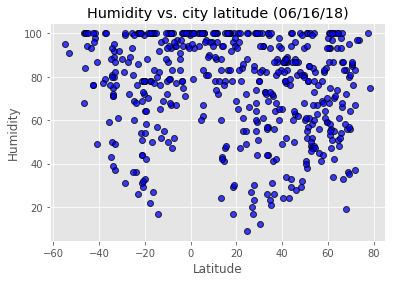

In [11]:
humidity = [x['humidity'] for x in df['main']]
plt.scatter(lat, humidity, c='b', alpha = 0.75, edgecolor = 'black', linewidths = 1)
plt.title ('Humidity vs. city latitude (06/16/18)')
plt.xlabel ('Latitude')
plt.ylabel ('Humidity')
plt.savefig('humidity_vs_lat.png', format='png')

## Cloudiness vs. Lattitude

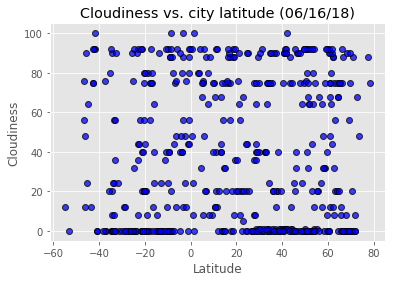

In [12]:
cloudiness = [list(x.values())[0] for x in df['clouds']]
plt.scatter(lat, cloudiness, c='b', alpha = 0.75, edgecolor = 'black', linewidths = 1)
plt.title ('Cloudiness vs. city latitude (06/16/18)')
plt.xlabel ('Latitude')
plt.ylabel ('Cloudiness')
plt.savefig('cloudiness_vs_lat.png', format='png')

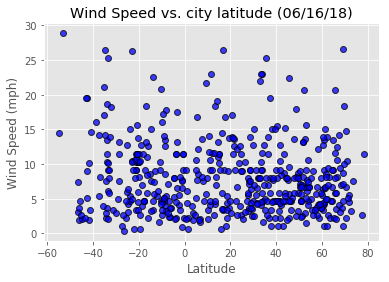

In [13]:
wind_speed = [x['speed'] for x in df['wind']]
plt.scatter(lat, wind_speed, c='b', alpha = 0.75, edgecolor = 'black', linewidths = 1)
plt.title ('Wind Speed vs. city latitude (06/16/18)')
plt.xlabel ('Latitude')
plt.ylabel ('Wind Speed (mph)')
plt.savefig('wind_speed_vs_lat.png', format='png')

## Supplemental exploration
### I thought it would be interesting to search the world for places where something dramatic is expected to happen with the weather.
### The following code chooses a set of cities at random, and calculates how much change is expected in the weather.  Ranking these results thus identifies places where the weather is expected to change greatly in the near future.

In [34]:
# import the city list from http://bulk.openweathermap.org/sample/city.list.json.gz
city_list = pd.read_json('city.list.json')

In [15]:
# compares the predicted weather with the current weather for a given city, and returns the expected change as an absolute value
def forecasted_deltas(city_id):
    # get the current weather for the city
    url = weather_base_url + "&id=" + str(city_id)
    weather_response = requests.get(url)
    if weather_response.ok:
        j = weather_response.json()
        current_temp = j['main']['temp']
        current_pressure = j['main']['pressure']
        current_windspeed = j['wind']['speed']
        # print (current_temp, current_pressure, current_windspeed)

    # get the forecast for the city
    forecast_base_url = "http://api.openweathermap.org/data/2.5/forecast?units=Imperial&APPID=" + api_key
    url = forecast_base_url + "&id=" + str(random_city.id)
    forecast_response = requests.get(url)

    if forecast_response.ok:
        j = forecast_response.json()
        # Multiple forecasts, for several different times, are returned for one request.
        # Find the maximum absolute difference between the current weather and any of these forecasts.
        max_deltas = {'d_temp': max([abs(current_temp - x['main']['temp']) for x in j['list']]),
                  'd_pressure': max([abs(current_pressure - x['main']['pressure']) for x in j['list']]),
                  'd_windspeed': max([abs(current_windspeed - x['wind']['speed']) for x in j['list']])}

    return max_deltas

In [36]:
#Gather a set of data about expected weather change
n_cities = 200
data = []
while len(data) < n_cities:
    # select a city at random (not based on a random choice of coordinates)
    random_city = city_list.iloc[np.random.randint(len(city_list))]
    # find the max of its expected weather change
    max_deltas = forecasted_deltas(random_city.id)
    # append the result to a list of dicts
    data.append({**random_city, **max_deltas})
df = pd.DataFrame(data)

In [43]:
# Top 5 cities where temperature is about to change
df.sort_values(by = 'd_temp', ascending = False).head()

,coord,country,d_pressure,d_temp,d_windspeed,id,name
173,"{'lon': -66.185417, 'lat': -25.09741}",AR,6.26,53.01,4.58,3863554,Departamento de CachÃ­
27,"{'lon': 27.364599, 'lat': -27.008051}",ZA,3.89,44.98,7.27,942683,Vredefort
172,"{'lon': -58.020889, 'lat': -31.39296}",AR,17.71,41.56,15.57,3435261,Concordia
164,"{'lon': -55.916672, 'lat': -25.950001}",PY,10.36,38.68,2.69,3438066,General Higinio Morinigo
114,"{'lon': -2.26302, 'lat': 41.533161}",ES,2.73,37.96,9.06,6361095,Bliecos


In [44]:
# Top 5 cities where pressure is about to change
df.sort_values(by = 'd_pressure', ascending = False).head()

,coord,country,d_pressure,d_temp,d_windspeed,id,name
179,"{'lon': -75.557953, 'lat': 6.33732}",CO,230.05,11.80,3.00,3688928,Bello
66,"{'lon': -111.439629, 'lat': 39.62635}",US,220.20,31.16,12.28,5539005,Fairview
73,"{'lon': 45.07605, 'lat': 37.552738}",IR,168.29,15.84,4.68,121801,Orumiyeh
90,"{'lon': 8.25068, 'lat': 46.89851}",CH,166.15,18.91,1.86,2658786,Sarnen
135,"{'lon': 9.48454, 'lat': 46.158989}",IT,159.24,15.17,1.59,6534458,Cino


In [45]:
# Top 5 cities where windspeed is about to change
df.sort_values(by = 'd_windspeed', ascending = False).head()

,coord,country,d_pressure,d_temp,d_windspeed,id,name
99,"{'lon': 56.341412, 'lat': 25.116409}",AE,4.88,13.32,27.15,292878,Al Fujayrah
183,"{'lon': 145.433334, 'lat': -37.783329}",AU,9.46,18.35,24.70,2144795,Wandin North
38,"{'lon': 144.372711, 'lat': -37.719952}",AU,9.35,18.61,23.13,2150895,Rowsley
69,"{'lon': 13.15765, 'lat': 58.505169}",SE,11.63,4.94,22.62,2696329,Lidkoping
23,"{'lon': 19.938009, 'lat': 54.464272}",RU,16.28,11.43,21.49,2609901,Mamonovo


In [38]:
# Plot expected temp change using a gmaps heatmap
import gmaps

gmaps.configure(api_key = api_keys.gmaps_api_key)
locations = [(x['lat'], x['lon']) for x in df['coord']]
fig = gmaps.figure(map_type = 'SATELLITE')
heatmap_layer = gmaps.heatmap_layer(locations, df['d_pressure'].values)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Plot expected pressure change using a gmaps heatmap

fig = gmaps.figure(map_type = 'SATELLITE')
heatmap_layer = gmaps.heatmap_layer(locations, df['d_pressure'].values)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Plot expected windspeed change using a gmaps heatmap

fig = gmaps.figure(map_type = 'SATELLITE')
heatmap_layer = gmaps.heatmap_layer(locations, df['d_windspeed'].values)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))